In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from IPython.display import HTML, Latex, Math

In [3]:
params = {'font.size':12, 'legend.fontsize':'medium', 'axes.labelsize':'large', 'axes.titlesize':'large'}
plt.rcParams.update(params)

In [4]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">Mostra/Nascondi celle</a>.''')

# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
# Valentina Guarino, mat. 978477

## <span style="color:red">  ESERCITAZIONE 2</span>

### Esercizio 02.1: calcolo di un integrale con tecniche MonteCarlo

Si vuole valutare il seguente integrale:

$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = \int_0^1 f(x) = 1$$

utilizzando tecniche di quadratura MonteCarlo.

#### Tecnica di quadratura MonteCarlo

Sia $f(x)$ una funzione di cui vogliamo calcolare l'integrale. Essa può essere scritta come prodotto tra una opportuna funzione $g(x)$ ed una opportuna distribuzione di probabilità $p(x)$

$$f(x) = g(x) \cdot p(x)$$

Si vuole valutare l'integrale

$$I = \int_{\Omega} f(x) dx = \int_{\Omega} g(x) \cdot p(x) dx, \\ \quad p(x)\geq 0 \quad \forall x \in \Omega, \quad\int_{\Omega} p(x)dx = 1$$

Si può definire un set di variabili random $x_i$ che seguano la distribuzione di probabilità $p(x)$ scelta. Valutando la funzione $g(x_i)$ associata alle variabili random $x_i$, il valore dell'integrale $I$ si trova come la media della quantità $G_N$:

$$\langle G_N \rangle = \frac{1}{N} \langle \sum_{i=1}^N g(x_i) \rangle = I$$ 

La media aritmetica $G_N$ è dunque una stima per l'integrale, e si può scrivere come il valore dell'integrale più un errore $\epsilon$: 

$$G_N = I + \epsilon$$

L'errore $\epsilon$ è una variabile random che, per grandi valori di N, ha un'ampiezza pari a

$$ \epsilon = \frac{\sigma_I}{\sqrt{N}}, \quad \sigma^2_I = \int_{\Omega} g(x)^2 p(x)dx - I^2$$

#### Importance sampling

L'importance sampling è una tecnica per migliorare il metodo di quadratura MonteCarlo. Introduciamo alla trattazione fatta in precedenza una nuova distribuzione di probabilità, $d(\vec{x})$, e immaginiamo di voler risolvere l'integrale n-dimensionale

$$I = \int \Big[\frac{g(\vec{x})p(\vec{x})}{d(\vec{x})}\Big]\cdot d(\vec{x}) d\vec{x} $$

con $d(\vec{x}) \geq 0 \quad \forall \vec{x}, \quad \int d(\vec{x}) d\vec{x} = 1$ e con $\frac{g(\vec{x})p(\vec{x})}{d(\vec{x})} < \infty$ eccetto per un set di punti a misura nulla. La varianza relativa all'integrale diventa dunque

$$\sigma^2_I = \langle \Big(\frac{g\cdot p}{d}\Big)^2 \rangle - \langle \frac{g \cdot p}{d} \rangle^2 = \int \Big[\frac{g(\vec{x})p(\vec{x})}{d(\vec{x})}\Big]^2 \cdot d(\vec{x}) d\vec{x} - I^2 $$

La distribuzione $d(\vec{x})$ normalizzata tale per cui $\langle \Big(\frac{g\cdot p}{d}\Big)^2 \rangle$ è minimizzata è pari a

$$ d(\vec{x}) = \frac{p(\vec{x}) g(\vec{x})}{I}$$ 

In questo caso si avrebbe un caso con $G_N = I$ e varianza nulla. Ciò sarebbe possibile solo nel caso in cui si conosca già a priori il valore dell'integrale $I$. 
Tuttavia è possibile diminuire il valore della varianza associata all'integrale, e dunque anche all'errore $\epsilon$ associato al calcolo, scegliendo una distribuzione di probabilità che sia _simile_ alla funzione da integrare.

#### Esercizio
Per valutare la convergenza dell'integrale al valore atteso facciamo due simulazioni: una campionando le $x_i$ seguendo una distribuzione uniforme di probabilità tra $[0,1]$, e una campionando una distribuzione di probabilità che segua il principio dell'importance sampling, che sia ovvero più simile possibile alla nostra funzione integranda $f(x)$. In entrambi i casi viene utilizzato il metodo a blocchi per il calcolo delle incertezze, e vengono dunque mostrate le medie cumulate per ogni blocco con i relativi errori.

#### Campionamento da distribuzione uniforme
Campionando le variabili random distribuite secondo una distribuzione uniforme di probabilità si ottiene il seguente grafico.

La varianza relativa all'integrale, calcolato come $\sigma^2_I = \langle g(x)^2 \rangle_p - \langle g(x) \rangle^2_p$, per una densità di probabilità uniforme $p(x) = 1$ è pari a

$$\sigma_I^2 = \langle g(x)^2 \rangle_p - \langle g(x) \rangle^2_p = \int_0^1 \big( \frac{\pi^2}{4}\cos^2(\pi x/2) dx \big)-1 \simeq 0.2336$$

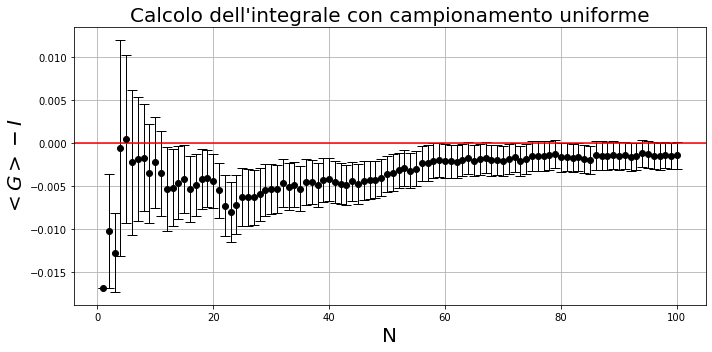

In [3]:
#Plot dei valori ottenuti con campionamento uniforme
plt.figure(figsize=(10,5))
N, I, std = np.loadtxt("Esercizio 2.01/Risultati/unif.dat", usecols=(0,1,2), unpack=True)
plt.errorbar(N,I-1,yerr=std, fmt = "ko", capsize = 5, elinewidth = 1)
plt.axhline(y=0,color="red")
plt.xlabel("N", fontsize = 20)
plt.ylabel("$<G>-I$", fontsize = 20)
plt.title("Calcolo dell'integrale con campionamento uniforme", fontsize = 20)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Campionamento tramite importance sampling
Applicando il principio dell'importance sampling, si sceglie una distribuzione di probabilità che sia simile all'integranda da valutare; scegliamo due possibili distribuzioni di probabilità (già normalizzate) che nell'intervallo $[0,1]$ abbiano un andamento simile a quello del coseno:
1. $p(x) = \frac{3}{2} \sqrt{1-x}$
2. $p(x) = 2(1-x)$

Il campionamento di RV che seguano le due distribuzioni date si ottiene tramite inversione della funzione cumulativa; ponendo $$F(x) = \int_0^1 p(x) = y$$ e risolvendo per $x$ si ottiene per i due casi:

**CASO 1.** $x = 1-(1-y)^{\frac{2}{3}}$, e $g(x) = \frac{\pi}{3}\frac{\cos(\frac{\pi}{2}x)}{\sqrt{1-x}}$

**CASO 2.** $x = 1-\sqrt{1-y}$, e  $g(x) = \frac{\pi}{4}\frac{\cos(\frac{\pi}{2}x)}{1-x}$

Valutando dunque l'integrale come media della funzione $g(x_i)$ si ottengono, per le due diverse distribuzioni di probabilità utilizzate nell'importance sampling, i seguenti risultati:

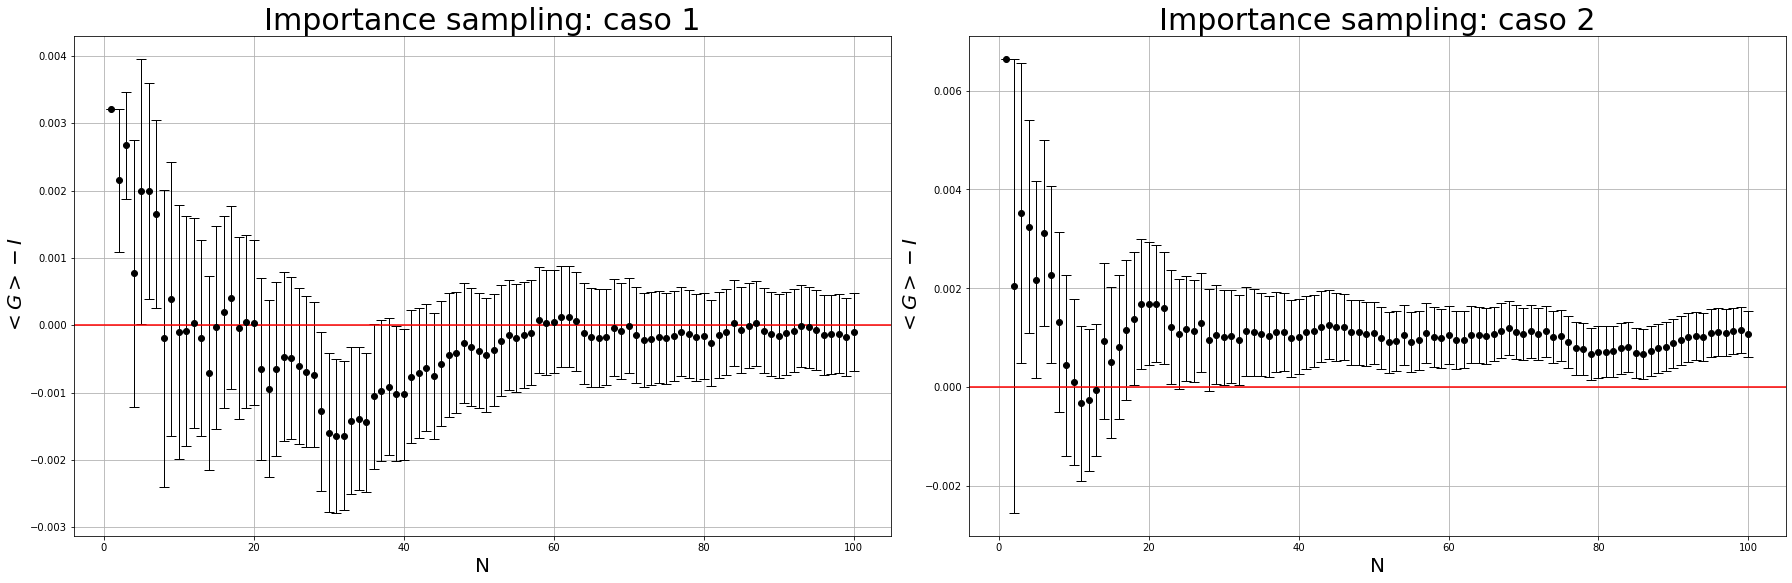

In [6]:
plt.figure(figsize=(25,25))

#Plot dei risultati ottenuti nel caso 1 di importance sampling
plt.subplot(2,2,1)
N, I, std = np.loadtxt("Esercizio 2.01/Risultati/impsampl_1.dat", usecols=(0,1,2), unpack=True)
plt.errorbar(N,I-1,yerr=std, fmt = "ko", capsize = 5, elinewidth = 1)
plt.axhline(y=0,color="red")
plt.xlabel("N", fontsize = 20)
plt.ylabel("$<G>-I$", fontsize = 20)
plt.title("Importance sampling: caso 1", fontsize = 30)
plt.grid(True)

plt.subplot(2,2,2)
#Plot dei risultati ottenuti nel caso 2 di importance sampling
N, I, std = np.loadtxt("Esercizio 2.01/Risultati/impsampl_2.dat", usecols=(0,1,2), unpack=True)
plt.errorbar(N,I-1,yerr=std, fmt = "ko", capsize = 5, elinewidth = 1)
plt.axhline(y=0,color="red")
plt.xlabel("N", fontsize = 20)
plt.ylabel("$<G>-I$", fontsize = 20)
plt.title("Importance sampling: caso 2", fontsize = 30)
plt.grid(True)

plt.tight_layout()
plt.subplots_adjust(top=0.7,hspace=0.5)
plt.show()

La varianza relativa al caso 1, con una $p(x) = \frac{3}{2} \sqrt{1-x}$, è pari a $\sigma^2_I = \langle g(x)^2 \rangle_p - \langle g(x) \rangle^2_p = \int_0^1 (\frac{\pi^2}{6}\frac{\cos^2(\frac{\pi}{2}x)}{1-x}\sqrt{1-x})- 1 \simeq 0.0129$.

La varianza relativa al caso 2, con una $p(x) = 2(1-x)$, è pari a $\sigma^2_I = \langle g(x)^2 \rangle_p - \langle g(x) \rangle^2_p = \int_0^1 (\frac{\pi^2}{8}\frac{\cos^2(\frac{\pi}{2}x)}{1-x}) - 1\simeq 0.0167$ 

Campionando con il metodo dell'importance sampling si ottiene dunque una varianza che è circa 10 volte più piccola rispetto a quella ottenuta campionando con una distribuzione uniforme; l'incertezza relativa alla misura, $\sigma_I = \sqrt{\sigma^2_I}$, è circa 3 volte inferiore.

Si nota inoltre come, tra le due distribuzioni di probabilità scelte nell'importance sampling, sia da preferire quella relativa al caso 1, ovvero $p(x) = \frac{3}{2} \sqrt{1-x}$, in quanto è quella con varianza associata minore.

Nel seguente grafico vengono messi a confronto i risultati dell'integrale nei casi di campionamento uniforme e importance sampling; si può notare come oltre ad avere una migliore convergenza con l'importance sampling, si abbiano anche incertezze molto inferiori.

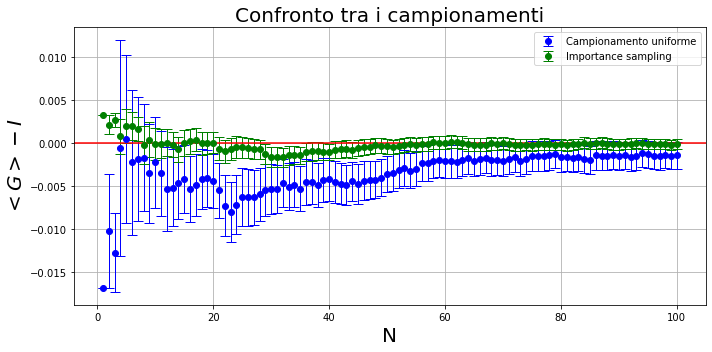

In [7]:
#Plot dei due campionamenti effettuati
plt.figure(figsize=(10,5))
N, I, std = np.loadtxt("Esercizio 2.01/Risultati/unif.dat", usecols=(0,1,2), unpack=True)
plt.errorbar(N,I-1,yerr=std, label = "Campionamento uniforme", fmt = "bo", capsize = 5, elinewidth = 1)
N, I_is, std_is = np.loadtxt("Esercizio 2.01/Risultati/impsampl_1.dat", usecols=(0,1,2), unpack=True)
plt.errorbar(N,I_is-1,yerr=std_is, label = "Importance sampling", fmt = "go", capsize = 5, elinewidth = 1)
plt.axhline(y=0,color="red")
plt.xlabel("N", fontsize = 20)
plt.ylabel("$<G>-I$", fontsize = 20)
plt.title("Confronto tra i campionamenti", fontsize = 20)
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

### Esercizio 02.2: implementazione di un Random Walk 3D nel discreto e nel continuo

Si simula per $10^4$ volte un random walk sia nel caso discreto, in un reticolo cubico con lattice constant $a=1$, sia nel caso continuo, facendo ad ogni tempo discreto un passo di lunghezza $a=1$. 

#### Random Walk

Il random walk può essere formalizzato come un processo di tipo markoviano, in cui la probabilità $p(x_n, t_n)$ nel punto $x_n$ al tempo $t_n$ dipende solo dallo stato _attuale_ $(x_{n-1}, t_{n-1})$ e non conserva dunque memoria del processo. Esso è formalizzato come 

$$p_{1|n-1}(x_n, t_n|x_1,t_1...x_{n-1}, t_{n-1}) = p_{1|1}(x_n,t_n|x_{n-1},t_{n-1})$$

Il random walk è una formalizzazione matematica di una traiettoria formata effettuando passi random consecutivi. Esso si può modellizzare come random walk su reticolo, in cui 
- Una particella si trova in un sito del reticolo
- Ad ogni istante discreto la particella compie un salto, spostandosi in uno dei siti vicini

Sia $p_1(na, s\tau)$ la probabilità di avere una particella su un punto lungo l'asse x pari ad $na$ dopo $s$ passi, con $\tau$ tempo intercorso tra un passo e l'altro. Passando nel limite continuo si ottiene un'equazione differenziale per $p_1$ di tipo diffusiva:

$$\frac{\partial p_1(x,t)}{\partial t} = D \frac{\partial^2 p_1(x,t)}{\partial^2 x}$$

con $D$ coefficiente di diffusione.
Risolvendo l'equazione otteniamo una probabilità gaussiana, con $\langle x(t) \rangle = 0, \langle x^2(t)\rangle = 2Dt$ ed in tre dimensioni

$$\langle \vec{r} \rangle = 0, \quad \langle \vec{r}^2\rangle = 2Dt$$ 

Poiché ad ogni tempo il walker compie un passo in una direzione, allora $t \simeq N$ dove N è il numero di passi. Si deve allora avere che 

$$\sqrt{\langle \vec{r}^2\rangle} = k\sqrt{N}$$ 

dove $k=\sqrt{2D}$ è una costante. Tale andamento, difatti, denoterebbe un comportamento diffusivo.
L'errore sulla misura $f(\vec{r_N}) = \sqrt{\langle \vec{r_N}^2\rangle}$ si ottiene tramite propagazione degli errori:
$$\sigma_{f}= \big|{\frac{\partial{f}}{\partial{r_N}}}\big|\sigma_{r_N}$$
Si ottiene dunque
$$\sigma_{f}=\frac{1}{2}(\langle \vec{r}_N^2\rangle)^{-\frac{1}{2}}\sqrt{\frac{\langle (\vec{r}_N^2)^2\rangle - \langle \langle \vec{r}_N^2\rangle \rangle^2}{N-1}}$$

#### Caso discreto
Si simula un random walk tridimensionale che a $t=0$ parta nell'origine. Ad ogni passo successivo il walker si può spostare in avanti o indietro lungo uno dei 3 assi in modo random. Si effettuano $N=100$ passi, e si ottiene il seguente comportamento al variare del numero di passi effettuati

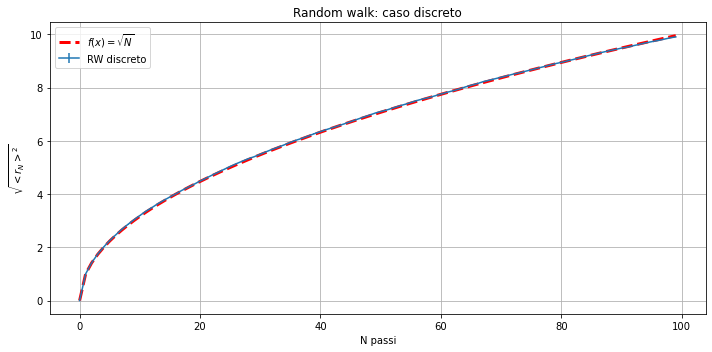

In [8]:
plt.figure(figsize=(10,5))
N, rw, std = np.loadtxt("Esercizio 2.02/Risultati/rwdiscr.dat", usecols=(0,1,2), unpack=True)
def sqrt(x): 
    return np.sqrt(x)
plt.errorbar(N,rw, yerr=std, label = "RW discreto")
plt.xlabel("N passi")
plt.ylabel("$\sqrt{<r_N>^2}$")
plt.grid(True)
plt.plot(sqrt(N), '--', color = 'red', linewidth = 3, label = "$f(x) = \sqrt{N}$")
plt.title('Random walk: caso discreto')
plt.legend(loc = "best")
plt.tight_layout()
plt.show()

Il processo può essere fittato con una funzione $f(x) = k\sqrt{N}$ con $k = \sqrt{2D} = 1$. Il processo è pertanto di tipo diffusivo, con coefficiente di diffusione $D=\frac{1}{2}$.

#### Caso continuo
Si simula in uno spazio continuo un random walk tridimensionale che a $t=0$ parta nell'origine. Il passo, di lunghezza $a=1$, in una direzione random si ottiene utilizzando le coordinate sferiche 
\begin{cases}
  x = a\cos(\theta)\sin(\phi) \\
y = a\sin(\theta)\sin(\phi)  \\
z = a\cos(\theta)
\end{cases}

Gli angoli $\theta \in [0,\pi]$ e $\phi \in [0, 2\pi]$ vengono campionati in modo uniforme. Per l'angolo $\theta$, il campionamento uniforme si ottiene implementando nel generatore di numeri casuali il metodo di inversione della funzione cumulativa.

Al variare del numero di passi si ottiene il seguente andamento

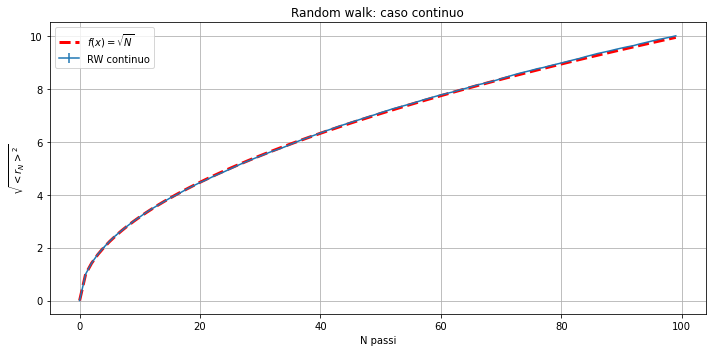

In [9]:
plt.figure(figsize=(10,5))
N, rw, std = np.loadtxt("Esercizio 2.02/Risultati/rwcont.dat", usecols=(0,1,2), unpack=True)
def sqrt(x): 
    return np.sqrt(x)
plt.errorbar(N,rw, yerr=std, label = "RW continuo")
plt.xlabel("N passi")
plt.ylabel("$\sqrt{<r_N>^2}$")
plt.title('Random walk: caso continuo')
plt.plot(sqrt(N), '--',color = 'red', linewidth = 3, label = "$f(x) = \sqrt{N}$")
plt.legend(loc = "best")
plt.grid(True)
plt.tight_layout()
plt.show()

Anche nel caso di un RW continuo l'andamento corrisponde a quello di una funzione $f(x) = k\sqrt{N}$ con $k=1$ e dunque $D=\frac{1}{2}$. L'andamento è dunque di tipo diffusivo. 